(C:filtre-intro)=
# Introduction

Un filtre est un _système_, c'est-à-dire un processus qui transforme un signal d'entrée $x$ en un signal de sortie $y$.

```{figure} _static/figs/filtre-def1.png
:width: 350px
```

$$
y = \mathcal{S}(x)
$$

Nous ne considérons dans le cours que des filtres _linéaires_ et _invariants_ (on parle donc de _systèmes linéaires invariants_).
Ces filtres permettent de modifier un signal d'entrée en atténuant ou en amplifiant certaines de ses fréquences.

<div class="example">

Une [égaliseur](https://fr.wikipedia.org/wiki/%C3%89galiseur)
est un appareil qui permet d'augmenter ou de réduire les basses et les aigus d'un signal sonore.
Il s'agit donc d'un filtre qui va amplifier ou atténuer les fréquences du signal.
    
```{image} https://images.unsplash.com/photo-1500702790369-fe461685b3c8?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1950&q=80
:alt: Égaliseur
:width: 300px
```

</div>

<div class="example">

Un filtre anti-repliement, que l'on utilise en amont d'un convertisseur analogique–numérique,
supprime les hautes fréquences afin d'éviter les problèmes de repliement spectral (ou _aliasing_) lors de l'échantillonnage.

</div>

<!-- Pendant longtemps, le rôle du filtrage à surtout constitué dans l'élimination des bruits et parasites présents dans les mesures.
Sa mise en œuvre a été du ressort des électroniciens.
Avec l'avènement de l'automatique et des calculateurs numériques,
le filtrage est devenu une théorie à part entière du traitement du signal. -->

## Vocabulaire

Cette section définit plusieurs termes spécifiques propres aux filtres et aux systèmes linéaires invariants.
Tout d'abord, nous expliquons ce qu'est un système linéaire invariant,
puis nous introduisons la notion de stabilité d'un système,
et enfin nous listons ce qui caractérise un filtre,
en particulier sa réponse impulsionnelle et sa réponse fréquentielle.


### Système linéaire

Un système $\mathcal{S}$ est linéaire si, lorsque son entrée est la somme pondérée de deux signaux $x$ et $y$,
alors sa sortie est la somme pondérée des réponses du système à $x$ et $y$ :
 
$$
\mathcal{S}(\alpha x + \beta y) = \alpha \mathcal{S}(x) + \beta \mathcal{S}(y).
$$

<div class="example">
    
Un élastique a, dans des conditions d'utilisation normale, un comportement linéaire :
plus on le tend ($\alpha$ augmente), plus il s'agrandit (et cela, de manière proportionnelle à $\alpha$).
Cependant, si la tension est trop forte, alors il casse et ne s'agrandit plus de manière proportionnelle à $\alpha$.
Dans ce cas, on ne peut plus le considérer comme étant linéaire.
</div>


### Système invariant

Un système est invariant dans le temps si son comportement et ses caractéristiques n'évoluent pas.
Aussi, si $y$ est la sortie du sytème à une entrée $x$,
ce sera toujours le cas quel que soit l'instant $n_0$ auquel apparaît $x$ :

$$
y[n] = \mathcal{S}(x[n])
\quad\Leftrightarrow\quad
y[n-n_0] = \mathcal{S}(x[n-n_0])
$$

<div class="example">

Un circuit électrique peut être considéré comme un système invariant,
car normalement les caractéristiques de ses composants ne varient pas dans le temps.
Ce n'est pas le cas lorsqu'on observe un circuit sur un temps très long (les composants changent en vieillissant),
dans des conditions qui évoluent (la température peut avoir un impact sur la résistance des composants)
ou si l'un des composants peut changer (potentiomètre par exemple).
</div>


### Système linéaire invariant

Les systèmes à la fois linéaires et invariants jouent un rôle important en traitement du signal.
On parle de systèmes linéaires invariant (_linear-time invariant system_ ou _LTI system_).
En effet, la linéarité et l'invariance ont un rôle fondamental pour trois raisons : 

* la plupart des systèmes physiques possèdent naturellement ces deux propriétés,
* l'analyse d'un système linéaire invariant peut être très poussée car c'est une modélisation simple,
* la sortie d'un système linéaire invariant s'exprime par la convolution de l'entrée
  avec la {ref}`réponse impulsionnelle <S:filtres-ri>` du système
  (ce qui n'est pas le cas pour d'autres systèmes n'ayant pas ces deux propriétés).


### Système stable

Un système est stable si une petite modification de son entrée ne fait pas diverger sa sortie,
c'est-à-dire qu'elle revient à son état initial où ne s'en éloigne pas indéfiniment
(elle atteint toujours une valeur limite).
Formellement, un système est stable si la sortie ne tend pas vers l'infini lorsque l'entrée ne tend pas non plus vers l'infini.
On peut montrer que sa {ref}`réponse impulsionnelle <S:filtres-ri>` est absolument sommable
(c'est-à-dire que l'intégrale, ou la somme, de la valeur absolue des valeurs de la réponse impulsionnelle n'est pas infinie).

<div class="example">
    
Un [pendule](https://fr.wikipedia.org/wiki/Pendule_simple) est un système stable :
quelle que soit la position et la vitesse initiale qu'on lui donne (et qui constituent l'entrée),
il oscillera autour de son point d'équilibre (la sortie du système étant sa position).
    
À l'inverse, un pendule inversé (qui est initialement positionné avec la masse en équilibre au dessus de l'axe de rotation)
n'est pas un système stable :
un petit déséquilibre de sa position intiale le fait tendre vers une position d'équilibre différente de la position initiale.
</div>


(S:filtres-ri)=
### Réponse impulsionnelle

Un filtre est caractérisé par sa réponse impulsionnelle (_impulse response_) $h$
qui correspond à la sortie du filtre lorsque l'entrée est une impulsion $\delta$.

```{figure} _static/figs/filtre-def2.png
:width: 350px
```

On montre que pour n'importe quelle entrée $x$, la sortie du filtre est la convolution entre $x$ et $h$ :

$$
  y = h * x.
$$

Si l'entrée est une impulsion, la sortie correspond bien à la réponse impulsionnelle h puisque $y=h*x = h*\delta=h$.


### Réponse fréquentielle

La transformée de Fourier de la réponse impulsionnelle est appelée «&nbsp;réponse fréquentielle&nbsp;» (_frequency response_).
Elle représente les modifications apportées au signal d'entrée en fonction de la fréquence.

Comme la sortie $y$ du filtre est la convolution de l'entrée $x$ avec la réponse impulsionnelle $h$,
alors la transformée de Fourier de la sortie $Y$ est la multiplication de la transformée de Fourier de l'entrée $X$
avec la réponse fréquentielle $H$ :

$$
  y = h * x
  \qquad\Leftrightarrow\qquad
  Y = H×X.
$$

Très souvent, la réponse fréquentielle est complexe (puisqu'elle est issue du calcul d'une transformée de Fourier).
Pour simplifier son analyse on étudiera plutôt son gain, sa phase ou son retard de groupe.


### Gain

Le gain (_magnitude_) $G$ d'un filtre est le module de sa réponse fréquentielle $H$ :

$$
  G(f) = \left|H(f)\right|.
$$

Il est souvent défini avec une échelle logarithmique et s'exprime alors en décibel (dB) :

$$
  G_\mathrm{dB}(f) = 20\,\log_{10} \left|H(f)\right|.
$$


### Phase

La phase (_phase_) $\varphi$ d'un filtre est l'argument de la réponse fréquentielle : 

$$
  \varphi(f) = \mathrm{Arg} \left(H(f)\right)
$$

où $\mathrm{Arg}$ est l'argument d'un nombre complexe.


### Retard de groupe

Une autre représentation importante est le retard de groupe (_group delay_) $\tau$ défini comme la dérivée de la phase :

$$
  \tau(f) = - \frac{1}{2\pi} \frac{d \varphi(f)}{df}.
$$

Une phase linéaire implique donc un retard de groupe constant.

(S:filtre-intro:ideaux)=
## Filtres idéaux

(S:filtre-intro:pbas)=
### Filtre passe bas 

Un filtre passe-bas (_low-pass filter_) laisse passer les fréquences faibles et arrête les fréquences hautes.
Sa réponse fréquentielle s'écrit sous la forme :

$$
H(f) = \begin{cases}
  K e^{-j 2\pi f a} &\text{si}\; |f| \leq f_c, \\
  0                 &\text{si}\; |f| > f_c
\end{cases}
$$

où $K$ et $a$ sont deux paramètres du filtre et $f_c$ est la «&nbsp;fréquence de coupure&nbsp;» (_cutoff frequency_).
Le gain de ce filtre est donc :

$$
G(f) = |H(f)| = \begin{cases}
  K &\text{si}\; |f| \leq f_c, \\
  0 &\text{si}\; |f| > f_c.
\end{cases}
$$

Le gain du filtre passe-bas idéal est représenté {numref}`F:filtre-intro:pbas-ideal` :
le gain dans les hautes fréquences est nul, donc le filtre passe-bas supprimera toute fréquence supérieure à $f_c$.
Cette bande de fréquence est appelée «&nbsp;bande atténuée&nbsp;»,
et la bande de fréquence pour laquelle le gain n'est pas nul est la « bande passante&nbsp;».

```{figure} _static/figs/filtre-pbas-ideal.png
---
width: 300px
name: F:filtre-intro:pbas-ideal
---
Gain d'un filtre passe-bas idéal.
```

Intéressons-nous à la réponse impulsionnelle de ce filtre,
en nous plaçant dans le domaine analogique.
Par définition, la réponse impulsionnelle $h(t)$ du filtre passe-bas idéal
est la transformée de Fourier inverse de sa réponse impulsionnelle $H(f)$, et donc :

$$
h(t) = 2 K f_c \mathrm{sinc}(2 f_c (t-a))
$$

```{admonition} Démonstration
:class: dropdown
$$
h(t) &= \mathcal{F}^{-1}\left[H(f)\right](t) \\
     &= \int_{-f_c}^{+f_c} K e^{-j 2\pi f a} e^{+j 2\pi f t} df \\
     &= \int_{-f_c}^{+f_c} K e^{+j 2\pi f (t-a)} df \\
     &= K \left[ \frac{e^{+j 2\pi f (t-a)}}{+j 2\pi (t-a)}  \right]_{-f_c}^{+f_c} \\
     &= K \frac{e^{+j 2\pi f_c (t-a)} - e^{-j 2\pi f_c (t-a)}}{+j 2\pi (t-a)} \\
     &= K \frac{1}{\pi (t-a)} \sin(2\pi f_c (t-a)) \\
     &= K \frac{1}{\pi (t-a)} \sin(2\pi f_c (t-a)) \frac{2f_c}{2f_c} \\
     &= 2 K f_c \mathrm{sinc}(2 f_c (t-a))
$$
```

La réponse impulsionnelle de l'équation précédente est représentée {numref}`F:filtre-intro:pbas-ideal-ri`.

```{glue:figure} G:filtre-intro:pbas-ideal-ri
:name: "F:filtre-intro:pbas-ideal-ri"

Réponse impulsionnelle du filtre passe-bas idéal (ici : $K$ = 0,9, $f_c$ = 0,5, $a$ = 0,7).
```

&nbsp;

```{margin}
En fait, il existe tout de même une manière de réaliser un filtre idéal en effectuant l'opération dans le domaine de Fourier.
Cela implique toutefois que le filtrage se fasse sur le signal en entier :
ce n'est donc possible que sur un signal enregistré, mais pas en temps réel.
```

On observe qu'elle est infinie, et donc non causale (elle n'est pas nulle pour $t<0$).
Qu'est-ce que cela implique ?
Et bien ce filtre n'est pas réalisable !
En effet, pour pouvoir implémenter un tel filtre (et donc effectuer convenablement la convolution),
il aurait déjà fallu commencer le filtrage il y a très très longtemps, et le filtrage se poursuivra jusqu'à la fin des temps ! 😵


### Filtre passe-haut

Un filtre passe-haut (_high-pass filter_) laisse passer les fréquences hautes et arrête les fréquences faibles.
Sa réponse fréquentielle s'écrit sous la forme suivante et son gain est représenté {numref}`F:filtre-intro:phaut-ideal`.
Comme pour le filtre passe-bas idéal, il n'est pas réalisable.

$$
H(f) = \begin{cases}
  K e^{-j 2\pi f a} &\text{si} |f| \geq f_c, \\
  0                 &\text{si} |f| < f_c.
\end{cases}
$$

```{figure} _static/figs/filtre-phaut-ideal.png
---
width: 300px
name: F:filtre-intro:phaut-ideal
---
Gain d'un filtre passe-haut idéal.
```


### Filtre passe-bande

Un filtre passe-bande (_band-pass filter_) laisse passer les fréquences moyennes,
entre deux fréquences de coupure $f_{c-}$ et $f_{c+}$.
Sa réponse fréquentielle s'écrit sous la forme suivante et son gain est représenté {numref}`F:filtre-intro:pbande-ideal`.
Il n'est pas réalisable.

$$
H(f) = \begin{cases}
  K e^{-j 2\pi f a} &\text{si} f_{c-} \leq |f| \leq f_{c+}, \\
  0                 &\text{sinon}.
\end{cases}
$$

```{figure} _static/figs/filtre-pbande-ideal.png
---
width: 300px
name: F:filtre-intro:pbande-ideal
---
Gain d'un filtre passe-bande idéal.
```


### Filtre coupe-bande

Un filtre coupe-bande (_band-stop filter_) ne supprime que les fréquences situées entre $f_{c-}$ et $f_{c+}$.
Sa réponse fréquentielle s'écrit sous la forme suivante et son gain est représenté {numref}`F:filtre-intro:cbande-ideal`.
Il n'est pas réalisable.

$$
H(f) = \begin{cases}
  0                 &\text{si} f_{c-} \leq |f| \leq f_{c+}, \\
  K e^{-j 2\pi f a} &\text{sinon}.
\end{cases}
$$

```{figure} _static/figs/filtre-cbande-ideal.png
---
width: 300px
name: F:filtre-intro:cbande-ideal
---
Gain d'un filtre coupe-bande idéal.
```


### Filtre passe tout

Un filtre passe-tout (_all-stop filter_) laisse passer toutes les fréquences sans les atténuer, mais modifie leur phase.
Il est utilisé pour linéariser la phase ou introduire des retards.
Sa réponse fréquentielle s'écrit sous la forme suivante et son gain est représenté {numref}`F:filtre-intro:ptout-ideal`.
Comme tous les filtres idéaux précédents, il n'est pas réalisable et bravo si vous lisez encore ce texte !

$$
H(f) = K e^{-j 2\pi f a}.
$$

```{figure} _static/figs/filtre-ptout-ideal.png
---
width: 300px
name: F:filtre-intro:ptout-ideal
---
Gain d'un filtre passe-tout idéal.
```

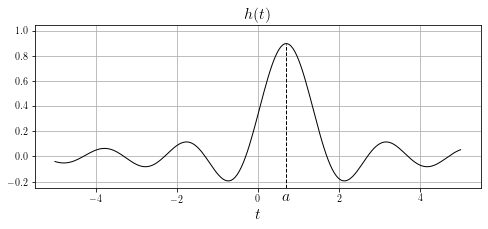

In [1]:
# Réponse impulsionnelle d'un filtre passe-bas idéal

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from myst_nb import glue

matplotlib.rcParams['text.usetex'] = True

K = 0.9
fc = 0.5
a = 0.7
t = np.arange(-5, 5, 0.051)
x = 2 * K * fc * np.sinc(2 * fc * (t-a))

fig = plt.figure(figsize=(8,3))
plt.plot(t, x, "k", linewidth=1)
plt.xlabel("$t$", size=16)
plt.title("$h(t)$", size=16)
plt.grid(True)
plt.axis([-5.5, 5.5, -.25, 1.05])

plt.plot([a, a], [-.25, 2*K*fc], "k", linewidth=1, linestyle="dashed")
plt.text(a, -.35, "$a$", fontsize=16, horizontalalignment="center")

glue("G:filtre-intro:pbas-ideal-ri", fig, display=False)

## Filtres réalisables

Comme on l'a vu dans la section {ref}`S:filtre-intro:ideaux`,
il est impossible de réaliser des filtres idéaux (en temporel en tout cas).
Par conséquent, les filtres réalisables ne sont que des approximations des filtres idéaux :
* des variations de gain dans les bandes passante et atténuée peuvent apparaître,
* les transitions d'une bande à l'autre ne peuvent pas être aussi brusques que pour les filtres idéaux.

La figure {numref}`F:filtre-intro:reel` représente un exemple de gain pour un filtre passe-bas réalisable.

```{figure} _static/figs/filtre-reel.png
---
width: 500px
name: F:filtre-intro:reel
---
Exemple de gain pour un filtre passe-bas réalisable (en bleu) et idéal (en rouge).
```

### Gabarit d'un filtre

Par conséquent, la définition des caractéristiques d'un filtre nécessite au préalable la définition d'un gabarit
(_filter specification_) qui définit :
* l'ondulation maximale autorisée en bande passante (_pass-band ripple_), que l'on souhaite la plus faible possible,
* l'atténuation minimale en bande atténuée (_stop-band attenuation_), que l'on souhaite la plus forte possible,
* la largeur de transition entre bande passante et bande atténuée (_transition band_),
  que l'on souhaite la plus étroite possible.

À cela s'ajoute la volonté d'avoir un filtre le plus simple possible (car plus facile à réaliser et moins cher),
ce qui implique une fonction de transfert d'ordre le plus faible possible (on le verra plus loin).


### Fréquence de coupure

Par ailleurs, la transition entre les bandes passante et atténuée n'étant plus instantanée,
il faut redéfinir la fréquence de coupure.
Généralement, la fréquence de coupure est définie comme la fréquence
à laquelle le filtre a perdu la moitié de sa puissance instantanée $P(f)$,
la puissance instantanée étant le carré du gain.

On cherche donc la valeur de $f$ pour laquelle $P(f) = \frac{1}{2} P_\mathrm{max}$, donc :

$$
P(f) &= \frac{1}{2} P_\mathrm{max} \\
\Leftrightarrow\qquad |H(f)|^2 &= \frac{1}{2} |H(f)|^2_\mathrm{max} \\
\Leftrightarrow\qquad 10 \log_{10} |H(f)|^2 &= 10 \log_{10} \left[ \frac{1}{2} |H(f)|^2_\mathrm{max} \right] \\
\Leftrightarrow\qquad 20 \log_{10} |H(f)| &= 10 \log_{10} \frac{1}{2} + 20 \log_{10} |H(f)|_\mathrm{max} \\
\Leftrightarrow\qquad G_\text{dB}(f) &\approx -3.010 + {G_\text{dB}}_\mathrm{max} \\
$$

En arrondissant la valeur de $10 \log_{10} \frac{1}{2}$ à $3$,
on définit la fréquence de coupure $f_c$ comme étant la fréquence à laquelle le gain du filtre
est à 3 dB sous le gain maximal.


### Conception d'un filtre

Pour résumer, la conception d'un filtre commence par la définition d'un gabarit,
puis on choisit une méthode de conception pour obtenir un filtre dont la réponse fréquentielle vérifie ce gabarit.
Les sections {ref}`C:filtre-analogique` et {ref}`C:filtre-numerique` présenteront des méthodes pour cela.

Jusqu'ici, on a beaucoup plus parlé des spécifications des filtres en gain, et non en phase.
En effet, la réalisation de filtres vérifiant à la fois des spécifications en gain et en phase est trop difficile,
voire impossible.
Heureusement, dans la plupart des applications, seul le gain est important ;
dans ce cas, la phase n'est pas spécifiée et acceptée telle quelle.

En revanche, si le gain et la phase sont tous les deux importants,
alors on conçoit d'abord un filtre vérifiant le gain puis, si la phase obtenue n'est pas satisfaisante,
on ajoute des filtres appelés « égaliseurs de phase » qui n'agissent que sur la phase.